# Data Exploration

In [1]:
# Importing required packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from statistics import median
from statistics import mean

C:\Users\lotta\AppData\Local\Temp\ipykernel_18012\834538649.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
import scipy.stats as stats

In [2]:
# Defining the paths to the data files
path = "C:/Users/lotta/OneDrive - genetixresearch.com/Jaitly_Data/Copy of KI day 1 cell data adjusted for Fov.xlsx"
path2 = "C:/Users/lotta/OneDrive - genetixresearch.com/Jaitly_Data/arun_Single_Target_Data 2.xlsx"
path3 = "C:/Users/lotta/OneDrive - genetixresearch.com/Jaitly_Data/FoV_KI_day3.xlsx"

In [4]:
# Reading the data files into panda DataFrames
ki_day1_df = pd.read_excel(path)
single_target_2_df = pd.read_excel(path2)
ki_day3_df = pd.read_excel(path3)

In [7]:
# Reading the conditions of the wells into a DataFrame
template = pd.read_excel("C:/Users/lotta/OneDrive - genetixresearch.com/Jaitly_Data/template_well_layout.xlsx", header=None)
template.head()

# Day 1

## Strip Plots showing the Median 

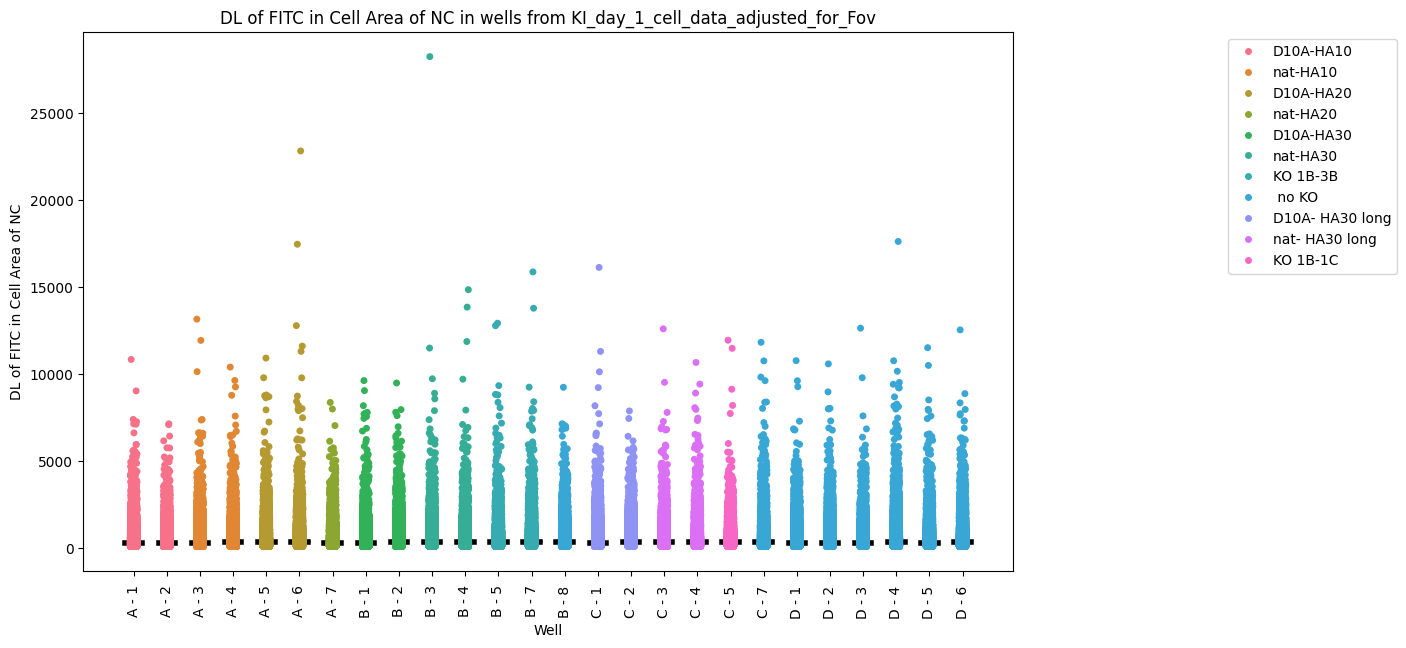

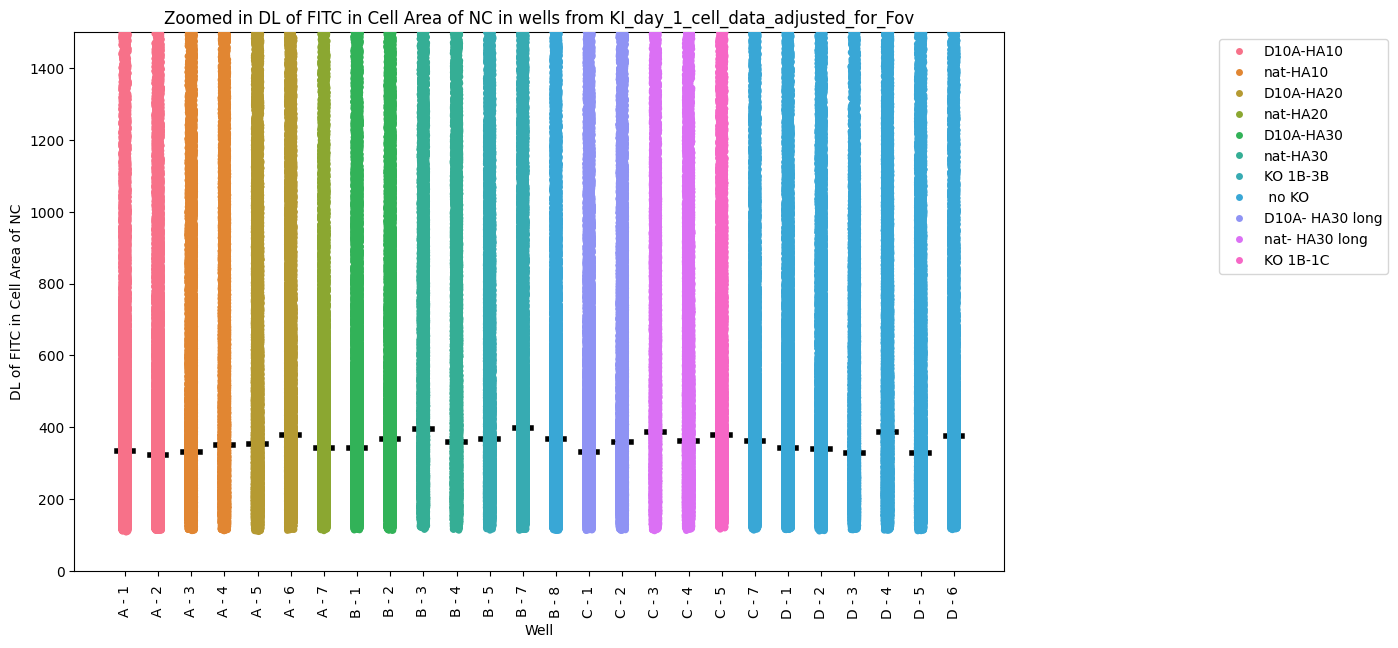

In [28]:
plt.figure(figsize=(12, 7))
sns.stripplot(x=ki_day1_df['Section'],
            y=ki_day1_df['DL of FITC in Cell Area of NC'],
            hue=ki_day1_df['Condition'])
plt.xticks(rotation=90)

med_width = 0.5
ticks = plt.xticks()
for i, j in zip(ticks[0], ticks[1]):
    med = median(ki_day1_df.loc[ki_day1_df['Section'] == j.get_text(), 'DL of FITC in Cell Area of NC'])
    plt.plot([i-med_width/2,i+med_width/2], [med, med], lw=4, color='k')

#plt.ylim(0, 2000)
plt.title('DL of FITC in Cell Area of NC in wells from KI_day_1_cell_data_adjusted_for_Fov')
plt.legend(loc='upper right', bbox_to_anchor=(1.42, 1))
plt.xlabel('Well')
plt.show()


plt.figure(figsize=(12, 7))
sns.stripplot(x=ki_day1_df['Section'],
            y=ki_day1_df['DL of FITC in Cell Area of NC'],
            hue=ki_day1_df['Condition'])
plt.xticks(rotation=90)

med_width = 0.5
ticks = plt.xticks()
for i, j in zip(ticks[0], ticks[1]):
    med = median(ki_day1_df.loc[ki_day1_df['Section'] == j.get_text(), 'DL of FITC in Cell Area of NC'])
    plt.plot([i-med_width/2,i+med_width/2], [med, med], lw=4, color='k')

plt.title('Zoomed in DL of FITC in Cell Area of NC in wells from KI_day_1_cell_data_adjusted_for_Fov')
plt.legend(loc='upper right', bbox_to_anchor=(1.42, 1))
plt.ylim(0, 1500)
plt.xlabel('Well')
plt.show()


## Calculating Statistics of each field in each well and showing Strip Plot of the field statistics of each well

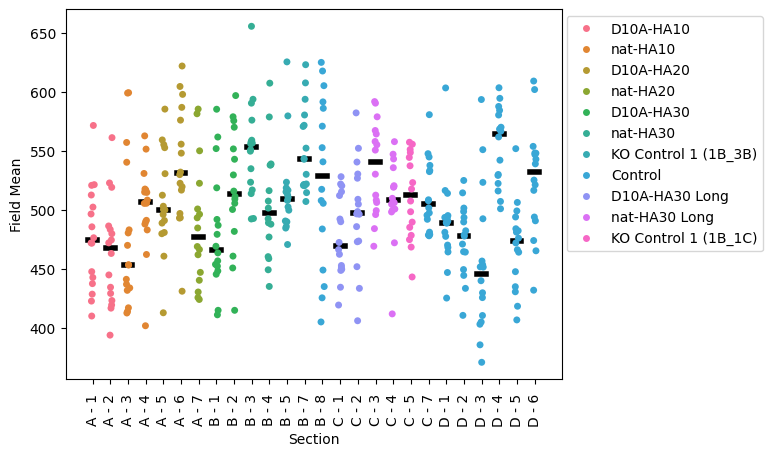

In [10]:
wells = ki_day1_df.Section.unique()

field_means = []

for i in range(0, len(wells)):
    
    subsection_df = ki_day1_df[ki_day1_df['Section'] == wells[i]]
    fields = subsection_df.FoV.unique()
    
    for j in range(0, len(fields)):
        well_field_means = [wells[i], fields[j]]
        well_field_means.append(subsection_df.loc[subsection_df['FoV'] == fields[j], 'DL of FITC in Cell Area of NC'].values.mean())
    
        field_means.append(well_field_means)
    
FoV_mean_df = pd.DataFrame(field_means, columns=['Section', 'Field', 'Field Mean'])


conditions = []
for i in range(0, len(template)):
    condition = template.iloc[i][1]
    well = template.iloc[i][0]
    FoV_mean_df.loc[FoV_mean_df['Section'].str.startswith(well), 'Condition'] = condition


sns.stripplot(x=FoV_mean_df['Section'], y=FoV_mean_df['Field Mean'], hue=FoV_mean_df['Condition'])
plt.legend(loc='upper right', bbox_to_anchor=(1.42, 1))

med_width = 0.5
ticks = plt.xticks()

for i, j in zip(ticks[0], ticks[1]):
    med = median(FoV_mean_df.loc[FoV_mean_df['Section'] == j.get_text(), 'Field Mean'])
    plt.plot([i-med_width/2,i+med_width/2], [med, med], lw=4, color='k')

plt.xticks(rotation=90)
plt.show()

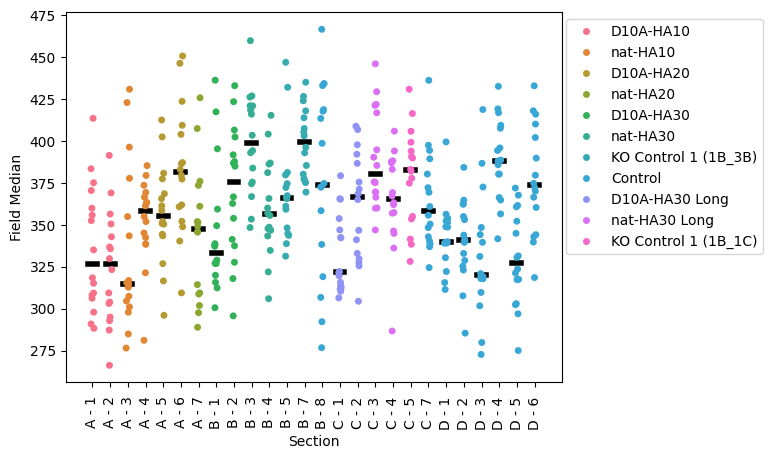

In [11]:
wells = ki_day1_df.Section.unique()

field_medians = []

for i in range(0, len(wells)):
    
    subsection_df = ki_day1_df[ki_day1_df['Section'] == wells[i]]
    fields = subsection_df.FoV.unique()
    
    for j in range(0, len(fields)):
        well_field_medians = [wells[i], fields[j]]
        well_field_medians.append(median(subsection_df.loc[subsection_df['FoV'] == fields[j], 'DL of FITC in Cell Area of NC'].values))
    
        field_medians.append(well_field_medians)
    
FoV_median_df = pd.DataFrame(field_medians, columns=['Section', 'Field', 'Field Median'])



conditions = []
for i in range(0, len(template)):
    condition = template.iloc[i][1]
    well = template.iloc[i][0]
    FoV_median_df.loc[FoV_median_df['Section'].str.startswith(well), 'Condition'] = condition

sns.stripplot(x=FoV_median_df['Section'], y=FoV_median_df['Field Median'], hue=FoV_median_df['Condition'])
plt.legend(loc='upper right', bbox_to_anchor=(1.42, 1))


med_width = 0.5
ticks = plt.xticks()
#display(FoV_median_df.head())
for i, j in zip(ticks[0], ticks[1]):
    med = median(FoV_median_df.loc[FoV_median_df['Section'] == j.get_text(), 'Field Median'])
    plt.plot([i-med_width/2,i+med_width/2], [med, med], lw=4, color='k')
    
plt.xticks(rotation=90)
plt.show()

C:\Users\lotta\AppData\Local\Temp\ipykernel_18012\1877883575.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=FoV_median_df['Condition'], y=FoV_median_df['Field Median'], palette='magma')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


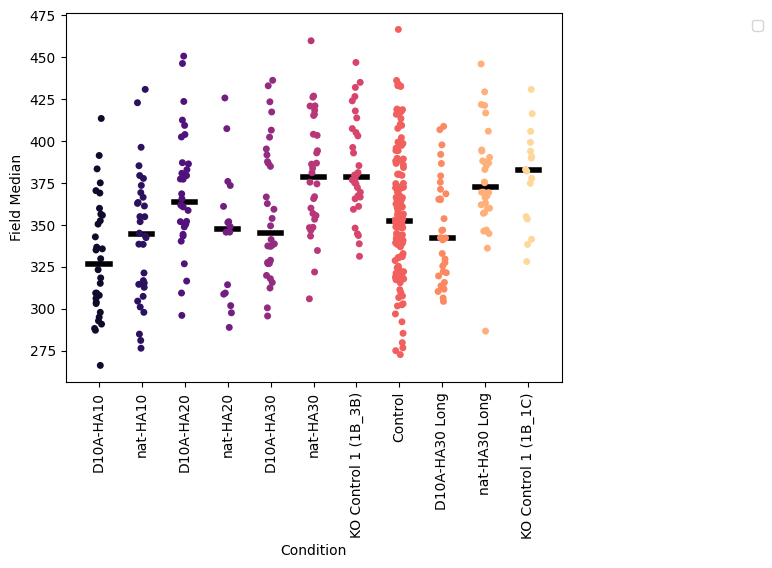

In [26]:
FoV_median_df
sns.stripplot(x=FoV_median_df['Condition'], y=FoV_median_df['Field Median'], palette='magma')
plt.legend(loc='upper right', bbox_to_anchor=(1.42, 1))


med_width = 0.5
ticks = plt.xticks()
#display(FoV_median_df.head())
for i, j in zip(ticks[0], ticks[1]):
    med = median(FoV_median_df.loc[FoV_median_df['Condition'] == j.get_text(), 'Field Median'])
    plt.plot([i-med_width/2,i+med_width/2], [med, med], lw=4, color='k')
    
plt.xticks(rotation=90)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


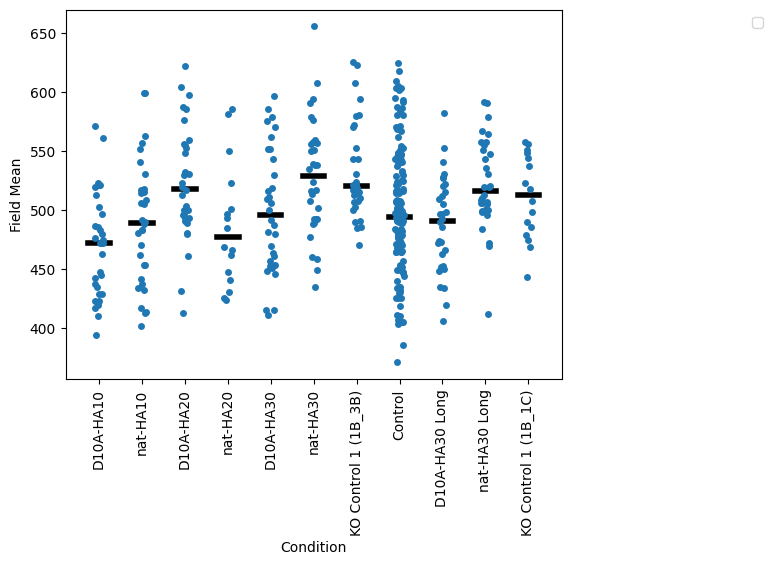

In [20]:
FoV_mean_df
sns.stripplot(x=FoV_mean_df['Condition'], y=FoV_mean_df['Field Mean'])
plt.legend(loc='upper right', bbox_to_anchor=(1.42, 1))


med_width = 0.5
ticks = plt.xticks()
#display(FoV_median_df.head())
for i, j in zip(ticks[0], ticks[1]):
    med = median(FoV_mean_df.loc[FoV_mean_df['Condition'] == j.get_text(), 'Field Mean'])
    plt.plot([i-med_width/2,i+med_width/2], [med, med], lw=4, color='k')
    
plt.xticks(rotation=90)
plt.show()

# Day 3

In [12]:
day3_columns = ['Section', 'Target Set', 'Sum Nuclei', 'Sum Count Cell', 'Sum NC', 'Max DL of FITC in Area of NC', 'Mean DL of FITC in Area of NC', 'Median Dl of FITC in Cell Area of NC', 'Sdt of DL of FITC in Area of NC']
ki_day3_df.columns = day3_columns
ki_day3_df_edit = ki_day3_df.loc[4:]

for i in range(0, len(template)):
    condition = template.iloc[i][1]
    well = template.iloc[i][0]
    ki_day3_df_edit.loc[ki_day3_df_edit['Section'].str.startswith(well), 'Condition'] = condition

ki_day3_df_edit

C:\Users\lotta\AppData\Local\Temp\ipykernel_18012\1777285237.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ki_day3_df_edit.loc[ki_day3_df_edit['Section'].str.startswith(well), 'Condition'] = condition


,Section,Target Set,Sum Nuclei,Sum Count Cell,Sum NC,Max DL of FITC in Area of NC,Mean DL of FITC in Area of NC,Median Dl of FITC in Cell Area of NC,Sdt of DL of FITC in Area of NC,Condition
4,A - 1 (fld 1),Summary,1076,893,881,2877.103,502.785,372.725,363.351,D10A-HA10
5,A - 1 (fld 2),Summary,1213,989,976,3352.583,525.657,411.929,380.017,D10A-HA10
6,A - 1 (fld 3),Summary,1232,1010,989,2769.319,441.596,349.012,298.492,D10A-HA10
7,A - 1 (fld 4),Summary,1264,1054,1035,3495.983,447.66,336.197,348.016,D10A-HA10
8,A - 1 (fld 5),Summary,1460,1209,1184,6377.008,448.661,333.313,389.93,D10A-HA10
...,...,...,...,...,...,...,...,...,...,...
1539,D - 6 (fld 48),Summary,1299,1081,1062,4128.509,428.287,322.67,333.129,Control
1540,D - 6 (fld 49),Summary,980,824,814,7752.646,411.022,291.006,469.579,Control
1541,D - 6 (fld 50),Summary,1305,1101,1082,5337.192,439.283,342.18,357.025,Control
1542,D - 6 (fld 51),Summary,1332,1114,1097,3081.508,400.894,308.003,310.061,Control


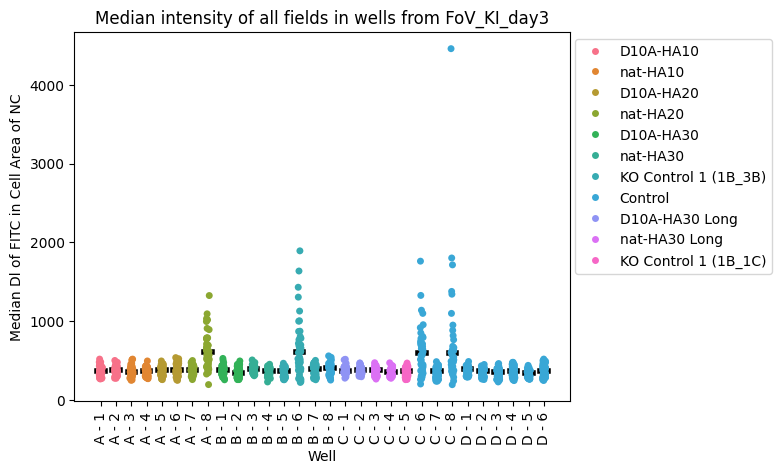

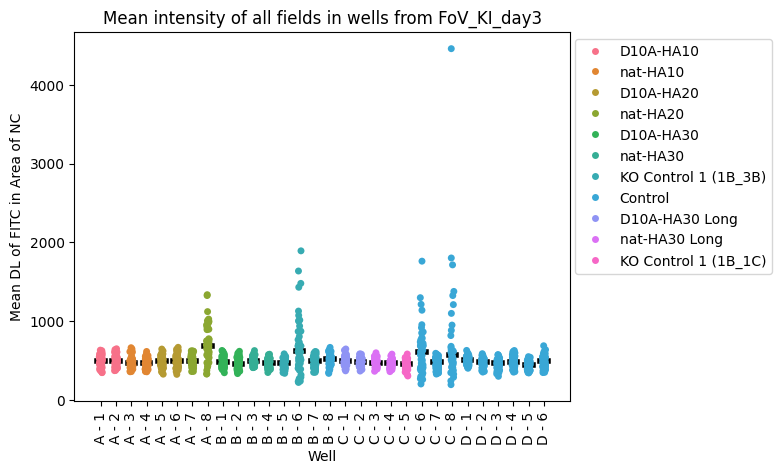

In [23]:
for i in list(template[0]):
    ki_day3_df_edit.loc[ki_day3_df_edit['Section'].str.startswith(i[:5]), 'Well'] = i[:5]

#plt.figure(figsize=(10, 8))
sns.stripplot(x=ki_day3_df_edit['Well'],
            y=ki_day3_df_edit['Median Dl of FITC in Cell Area of NC'],
            hue=ki_day3_df_edit['Condition'])
plt.xticks(rotation=90)
#plt.ylim(0, 2000)

med_width = 0.5
ticks = plt.xticks()
#display(FoV_median_df.head())
for i, j in zip(ticks[0], ticks[1]):
    med = median(ki_day3_df_edit.loc[ki_day3_df_edit['Well'] == j.get_text(), 'Median Dl of FITC in Cell Area of NC'])
    plt.plot([i-med_width/2,i+med_width/2], [med, med], lw=4, color='k')



plt.title('Median intensity of all fields in wells from FoV_KI_day3')
plt.legend(loc='upper right', bbox_to_anchor=(1.42, 1))
plt.show()



#plt.figure(figsize=(10, 8))
sns.stripplot(x=ki_day3_df_edit['Well'],
            y=ki_day3_df_edit['Mean DL of FITC in Area of NC'],
            hue=ki_day3_df_edit['Condition'])
plt.xticks(rotation=90)
#plt.ylim(0, 2000)

med_width = 0.5
ticks = plt.xticks()
#display(FoV_median_df.head())
for i, j in zip(ticks[0], ticks[1]):
    med = median(ki_day3_df_edit.loc[ki_day3_df_edit['Well'] == j.get_text(), 'Mean DL of FITC in Area of NC'])
    plt.plot([i-med_width/2,i+med_width/2], [med, med], lw=4, color='k')



plt.title('Mean intensity of all fields in wells from FoV_KI_day3')
plt.legend(loc='upper right', bbox_to_anchor=(1.42, 1))
plt.show()

In [ ]:
ki_day1_df['Intensity Density']=ki_day1_df['DL of FITC in Cell Area of NC']/ki_day1_df['Area of NC cells']
sns.stripplot(x=ki_day1_df['Condition'], y=ki_day1_df['Intensity Density'])

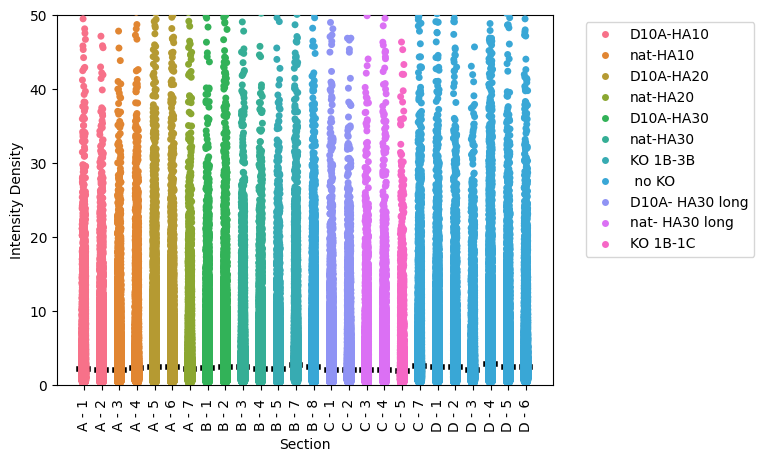

In [41]:
sns.stripplot(x=ki_day1_df['Section'], y=ki_day1_df['Intensity Density'], hue=ki_day1_df['Condition'])
plt.legend(loc='upper right', bbox_to_anchor=(1.42, 1))
plt.xticks(rotation=90)
med_width = 0.5

ticks = plt.xticks()
#display(FoV_median_df.head())
for i, j in zip(ticks[0], ticks[1]):
    med = median(ki_day1_df.loc[ki_day1_df['Section'] == j.get_text(), 'Intensity Density'])
    plt.plot([i-med_width/2,i+med_width/2], [med, med], lw=4, color='k')

plt.ylim(0,50)

plt.show()

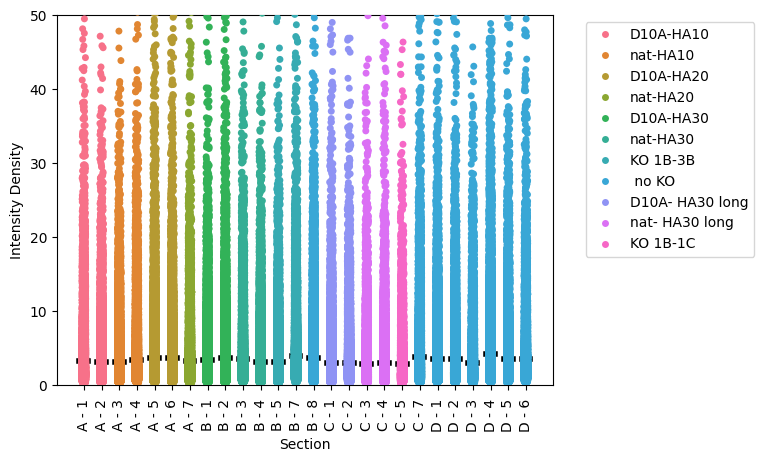

In [44]:
sns.stripplot(x=ki_day1_df['Section'], y=ki_day1_df['Intensity Density'], hue=ki_day1_df['Condition'])
plt.legend(loc='upper right', bbox_to_anchor=(1.42, 1))
plt.xticks(rotation=90)
med_width = 0.5

ticks = plt.xticks()
#display(FoV_median_df.head())
for i, j in zip(ticks[0], ticks[1]):
    mean = (ki_day1_df.loc[ki_day1_df['Section'] == j.get_text(), 'Intensity Density']).values.mean()
    plt.plot([i-med_width/2,i+med_width/2], [mean, mean], lw=4, color='k')

plt.ylim(0,50)

plt.show()